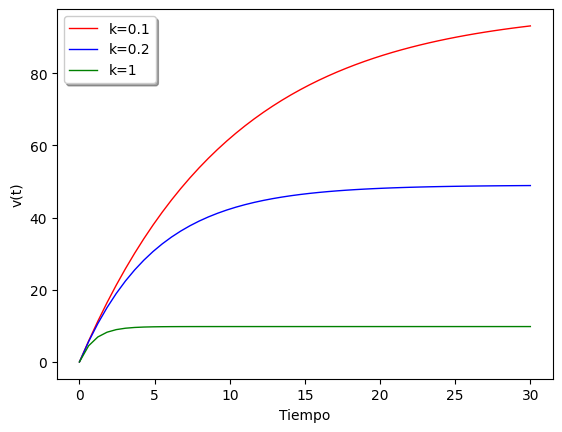

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# función que entrega dv/dt
def modelo(v,t,k):
    dvdt = g - k * v/m
    return dvdt

# condición inicial
v0 = 0

#parámetros
g = 9.8
m = 1 

# valores de tiempo
t = np.linspace(0,30)

# soluciones EDO para distintos k
k = 0.1
v1 = odeint(modelo,v0,t,args=(k,))
k = 0.2
v2 = odeint(modelo,v0,t,args=(k,))
k = 1
v3 = odeint(modelo,v0,t,args=(k,))

# gráfico
plt.plot(t,v1,'r',linewidth=1,label='k=0.1')
plt.plot(t,v2,'b',linewidth=1,label='k=0.2')
plt.plot(t,v3,'g',linewidth=1,label='k=1')
plt.xlabel('Tiempo')
plt.ylabel('v(t)')
plt.legend(shadow=True)
plt.show()

In [2]:
from sympy import symbols, Function, dsolve

# Símbolos
t, g, k , m, v0= symbols("t, g, k, m, v0")

# v es función del tiempo
v = Function('v')(t)

# Derivada de v
dvdt = v.diff(t)

# Ecuación diferencial
eq = dvdt - g + k*v/m

# Solución de la EDO con la condición inicial v(0)=v0
dsolve(eq, v, ics={v.subs(t, 0): v0})

Eq(v(t), g*m/k + (-g*m + k*v0)*exp(-k*t/m)/k)

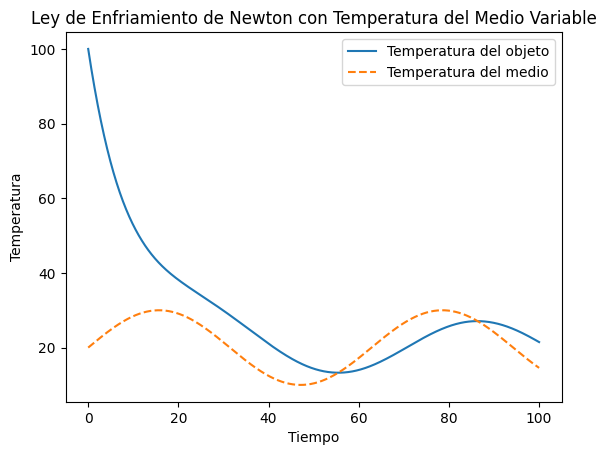

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la ley de enfriamiento de Newton
k = -0.1  # Constante de enfriamiento

# Función que define la temperatura del medio variable en el tiempo
def T_m(t):
    return 20 + 10 * np.sin(0.1 * t)

# Definición de la EDO para la ley de enfriamiento de Newton
def Newton(t, T):
    return k * (T - T_m(t))

# Condición inicial
T0 = 100  # Temperatura inicial del objeto

# Intervalo de tiempo para la simulación
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver la EDO
sol = solve_ivp(Newton, t_span, [T0], t_eval=t_eval)

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='Temperatura del objeto')
plt.plot(sol.t, T_m(sol.t), label='Temperatura del medio', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.title('Ley de Enfriamiento de Newton con Temperatura del Medio Variable')
plt.show()

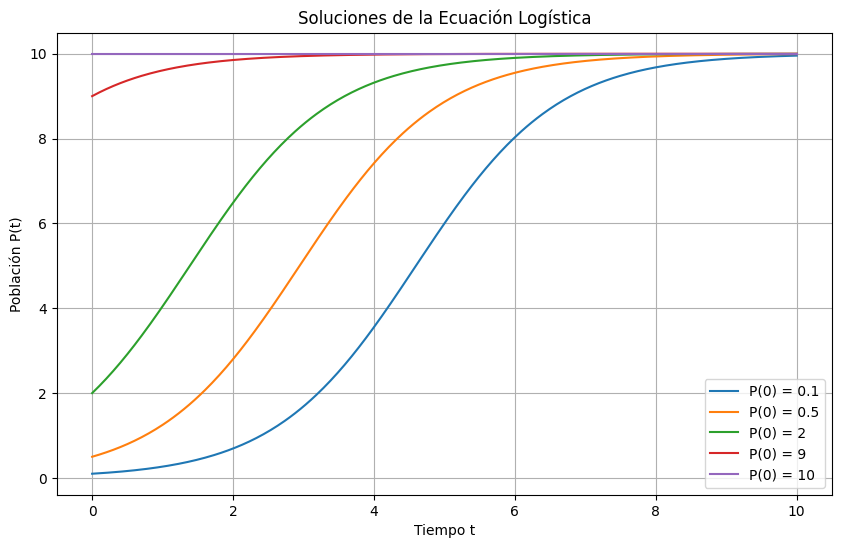

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros de la ecuación
a = 1.0  # Tasa de crecimiento
b = 0.1  # Tasa de competencia

# Ecuación diferencial logística
def logistica_ec(P, t):
    return a * P - b * P**2

# Tiempo para la integración
t = np.linspace(0, 10, 400)

# Condiciones iniciales diferentes
P0_vals = [0.1, 0.5, 2, 9, 10]

# Soluciones para cada condición inicial
sols = [odeint(logistica_ec, P0, t) for P0 in P0_vals]

# Graficar el las soluciones
plt.figure(figsize=(10, 6))
for i, P0 in enumerate(P0_vals):
    plt.plot(t, sols[i], label=f'P(0) = {P0}')
plt.xlabel('Tiempo t')
plt.ylabel('Población P(t)')
plt.title('Soluciones de la Ecuación Logística')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from scipy.integrate import solve_ivp

# Definición de la EDO
def f(x, y):
    return np.sin(x)*np.cos(y)

# Definir la función para trazar el campo de pendientes y las soluciones.
def plot_slope_field(a=-5, b=5, c=-5, d=5, n=20, x0=0, y0=1):
    x = np.linspace(a, b, n)
    y = np.linspace(c, d, n)
    X, Y = np.meshgrid(x, y)
    U = 1
    V = f(X, Y)
    
    # Normalización de las flechas
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U2, V2, angles="xy")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo de pendientes')
    plt.xlim([a, b])
    plt.ylim([c, d])
    plt.grid()
    
    # Resolución de la EDO con condición inicial en ambas direcciones.
    def ode_system(t, y):
        return f(t, y)
    
    # Hacia adelante en el tiempo
    t_span_forward = [x0, b]
    t_eval_forward = np.linspace(x0, b, 100)
    sol_forward = solve_ivp(ode_system, t_span_forward, [y0], t_eval=t_eval_forward)
    
    # Hacia atrás en el tiempo
    t_span_backward = [x0, a]
    t_eval_backward = np.linspace(x0, a, 100)
    sol_backward = solve_ivp(ode_system, t_span_backward, [y0], t_eval=t_eval_backward)
    
    # Gráfico de la solución
    plt.plot(sol_forward.t, sol_forward.y[0], 'r', label=f'Solución con CI: y({round(x0,2)})={round(y0,2)}')
    plt.plot(sol_backward.t, sol_backward.y[0], 'r')
    plt.scatter([x0], [y0], color='red')  # Condición inicial
    plt.legend()
    plt.show()

# Widgets interactivos
a_slider = widgets.FloatSlider(value=-5, min=-10, max=0, step=0.1, description='a:')
b_slider = widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='b:')
c_slider = widgets.FloatSlider(value=-5, min=-10, max=0, step=0.1, description='c:')
d_slider = widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='d:')
n_slider = widgets.IntSlider(value=20, min=10, max=50, step=1, description='n:')
x0_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='x0:')
y0_slider = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='y0:')

interactive_plot = interactive(plot_slope_field, a=a_slider, b=b_slider, c=c_slider, d=d_slider, n=n_slider, x0=x0_slider, y0=y0_slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=-5.0, description='a:', max=0.0, min=-10.0), FloatSlider(value=5.0, de…